In [1]:
import numpy as np
import os
from typing import Tuple
import tensorflow as tf
from sklearn.utils import class_weight

In [2]:
from constants import *

# LSTM Classification

In [3]:
x_training = np.load(os.path.join(TRAINING_PATH, "class", "features.npy"), allow_pickle=True) # load the training features
x_training = np.array([x_training[i].T for i in range(x_training.shape[0])])[-800:] # reshape the training features
y_training = np.load(os.path.join(TRAINING_PATH, "class", "labels.npy"), allow_pickle=True)[-800:] # load the training labels
y_training = np.array([-1 if y<0 else 0 if y==0 else 1 for y in y_training-2])+1 # reshape the training labels
print(y_training)

# Calculate class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_training), y=y_training) 

# Convert class weights to a dictionary
class_weights_dict = dict(enumerate(class_weights))

INPUT_DIM = x_training.shape[1:] # get the input dimension

[0 0 2 2 0 1 2 1 2 0 0 0 1 1 0 1 2 0 1 1 2 0 0 1 1 0 0 2 0 1 0 1 1 2 1 1 0
 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 1 2 1 2 0 0 1 2 1 1 2 1 1 1
 2 0 2 1 1 1 1 0 2 1 1 0 1 1 2 1 0 2 2 2 1 1 0 2 1 0 2 1 2 2 1 2 0 2 0 2 1
 1 1 1 1 1 1 0 2 1 0 1 2 1 1 1 1 1 2 1 0 1 1 0 2 1 1 2 0 1 2 1 2 1 2 0 1 1
 2 0 1 1 0 1 2 2 0 2 2 2 2 2 2 2 0 1 2 2 2 0 2 1 2 1 0 2 0 1 0 2 2 2 1 1 1
 0 0 2 0 1 1 2 0 1 1 2 1 2 1 2 0 0 1 0 2 1 0 2 2 1 2 0 2 0 1 2 1 1 0 0 1 0
 2 1 1 1 1 1 1 1 1 1 1 1 0 1 2 2 1 1 2 1 1 1 0 1 2 1 0 2 2 1 1 1 0 2 0 1 1
 1 2 0 2 2 2 2 0 2 0 1 2 1 2 0 0 2 2 1 1 2 2 1 2 1 0 0 1 2 2 2 0 1 2 0 2 1
 1 0 2 0 0 2 2 1 1 2 1 1 1 0 0 2 0 2 1 1 2 2 1 2 1 1 2 2 2 2 2 1 1 2 1 0 0
 2 2 0 2 1 1 2 1 0 2 1 2 0 1 0 2 1 1 0 2 2 2 0 2 1 1 2 1 1 1 1 1 1 1 1 2 2
 1 1 1 0 0 1 0 1 1 1 2 0 2 1 1 2 2 2 1 0 1 0 2 0 0 1 1 0 1 1 1 0 1 0 1 2 1
 1 2 1 2 2 2 0 2 1 1 0 2 1 2 1 1 2 2 2 0 0 0 0 2 1 1 1 0 2 2 2 2 1 1 2 1 2
 0 2 1 1 2 1 1 2 0 1 2 0 1 0 1 0 2 0 0 0 2 1 2 0 0 0 1 2 1 1 2 0 1 1 1 1 1
 0 0 1 2 1 1 0 1 0 1 1 0 

In [4]:
x_test = np.load(os.path.join(TEST_PATH, "class", "features.npy"), allow_pickle=True) # load the test features
x_test = np.array([x_test[i].T for i in range(x_test.shape[0])]) # reshape the test features
y_test = np.load(os.path.join(TEST_PATH, "class", "labels.npy"), allow_pickle=True) # load the test labels
y_test = np.array([-1 if y<0 else 0 if y==0 else 1 for y in y_test-2])+1 # reshape the test labels

In [5]:
x_full = np.concatenate((x_training, x_test)) # concatenate the training and test features
y_full = np.concatenate((y_training, y_test)) # concatenate the training and test labels
x_train_n_inst = int(np.ceil(x_full.shape[0]*0.8)) # get the number of training instances

x_training = x_full[:x_train_n_inst] # get the training features
y_training = y_full[:x_train_n_inst] # get the training labels

x_test = x_full[x_train_n_inst:] # get the test features
y_test = y_full[x_train_n_inst:] # get the test labels

x_training = tf.convert_to_tensor(x_training.astype('float32')) # convert the training features to a tensor
y_training = tf.convert_to_tensor(y_training.astype('int32')) # convert the training labels to a tensor

x_test = tf.convert_to_tensor(x_test.astype('float32')) # convert the test features to a tensor
y_test = tf.convert_to_tensor(y_test.astype('int32')) # convert the test labels to a tensor

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [6]:
# class_weights_np = np.array(class_weights)
# class_weights_np[0] = 2.2
# class_weights = tf.convert_to_tensor(class_weights_np.astype('float32'))
# class_weights

In [7]:
print(f"Number of instances belonging to each class: {np.unique(y_training, return_counts=True)[1]}")
print(f"Class weights: {class_weights}")
print(f"Weighted number of instances belonging to each class: {np.unique(y_training, return_counts=True)[1]*class_weights}")

Number of instances belonging to each class: [240 416 300]
Class weights: [1.38888889 0.75542965 1.04575163]
Weighted number of instances belonging to each class: [333.33333333 314.25873466 313.7254902 ]


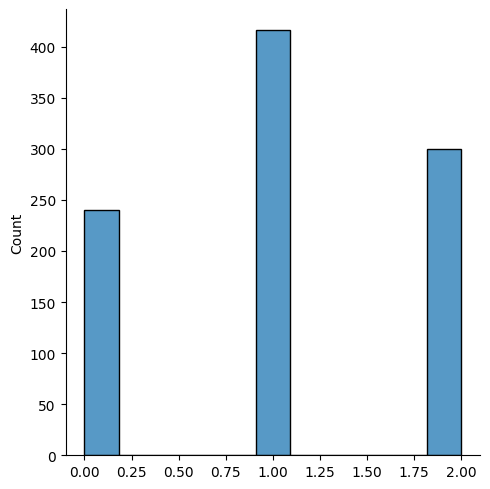

In [8]:
# Visualize the distribution of the training labels
import seaborn as sns
sns.displot(y_training)

In [9]:
class_weights = tf.cast(tf.constant(class_weights), "float32") # convert the class weights to a tensor

In [10]:
def weightedLoss(weights=tf.constant([1,1,1,1,1])):

    """Weighted loss for a multi-class classification problem"""

    def innerLoss(true, pred):
        w = tf.gather(weights, true) # Get the weight of the true labels

        loss = tf.keras.backend.sparse_categorical_crossentropy(true, pred) # Calculate the loss
        loss = w * loss # Apply the weights

        return loss

    return innerLoss

In [29]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) # define the early stopping callback
lr_scheduler_plt = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001) # define the learning rate scheduler callback
lr_scheduler_exp = tf.keras.optimizers.schedules.ExponentialDecay(0.001, 10, 0.9, staircase=True) # define the learning rate scheduler

In [30]:
def create_lstm_model(input_shape:Tuple[int, int]) -> tf.keras.Model:

    """Create a LSTM model"""
    
    # Define the model
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape), # define the input layer with the input shape
        tf.keras.layers.LSTM(27, activation="tanh", return_sequences=False), # define the LSTM layer
        tf.keras.layers.Dense(64, activation="relu"), # define the dense layer
        tf.keras.layers.Dense(5, activation="softmax") # define the output layer
    ])

    # Compile the model
    model.compile(
        loss=weightedLoss(class_weights), # set the loss function to the weighted loss function
        optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001), # set the optimizer to Adam
        metrics=["acc"] # set the metrics to accuracy
    )

    return model

In [31]:
model = create_lstm_model(INPUT_DIM) # create the model

In [32]:

history = model.fit(x_training, # train the model
                    y_training, 
                    validation_split=VALIDATION_SPLIT, # set the validation split
                    epochs=EPOCHS, # set the number of epochs
                    batch_size=32, # set the batch size
                    validation_batch_size=BATCH_SIZE, # set the validation batch size
                    callbacks=[lr_scheduler_plt] # set the callbacks
                    )

Epoch 1/50
27/27 [==============================] - 2s 40ms/step - loss: 1.0946 - acc: 0.4070 - val_loss: 1.0189 - val_acc: 0.5000 - lr: 0.0010
Epoch 2/50
27/27 [==============================] - 0s 15ms/step - loss: 1.0857 - acc: 0.4302 - val_loss: 1.0165 - val_acc: 0.5000 - lr: 0.0010
Epoch 3/50
27/27 [==============================] - 0s 15ms/step - loss: 1.0776 - acc: 0.4314 - val_loss: 1.0192 - val_acc: 0.5000 - lr: 0.0010
Epoch 4/50
27/27 [==============================] - 0s 15ms/step - loss: 1.0669 - acc: 0.4384 - val_loss: 1.0181 - val_acc: 0.4896 - lr: 0.0010
Epoch 5/50
27/27 [==============================] - 0s 14ms/step - loss: 1.0516 - acc: 0.4535 - val_loss: 1.0221 - val_acc: 0.4271 - lr: 0.0010
Epoch 6/50
27/27 [==============================] - 0s 14ms/step - loss: 1.0296 - acc: 0.4686 - val_loss: 1.0141 - val_acc: 0.4271 - lr: 0.0010
Epoch 7/50
27/27 [==============================] - 0s 14ms/step - loss: 0.9912 - acc: 0.5081 - val_loss: 1.0244 - val_acc: 0.4792 - lr:

In [33]:
model.summary() # print the model summary

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 27)                6912      
                                                                 
 dense_8 (Dense)             (None, 64)                1792      
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 8,899
Trainable params: 8,899
Non-trainable params: 0
_________________________________________________________________


In [34]:
accuracy = history.history["acc"] # get the accuracy
val_accuracy = history.history["val_acc"] # get the validation accuracy

loss = history.history["loss"] # get the loss
val_loss = history.history["val_loss"] # get the validation loss

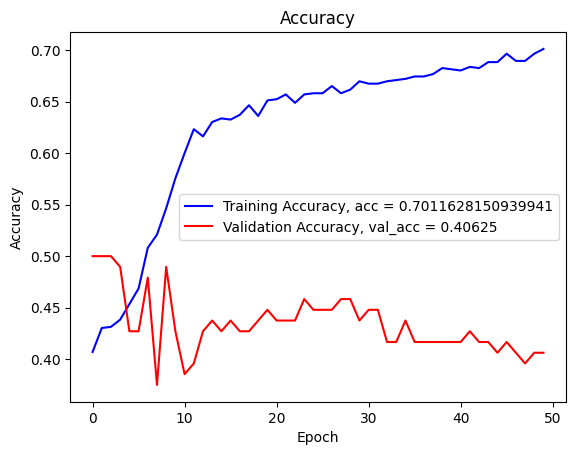

In [35]:
# Plot the accuracy
import matplotlib.pyplot as plt

plt.plot(range(len(accuracy)), accuracy, "b", label = f"Training Accuracy, acc = {accuracy[-1]}")
plt.plot(range(len(accuracy)), val_accuracy, "-r", label = f"Validation Accuracy, val_acc = {val_accuracy[-1]}")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

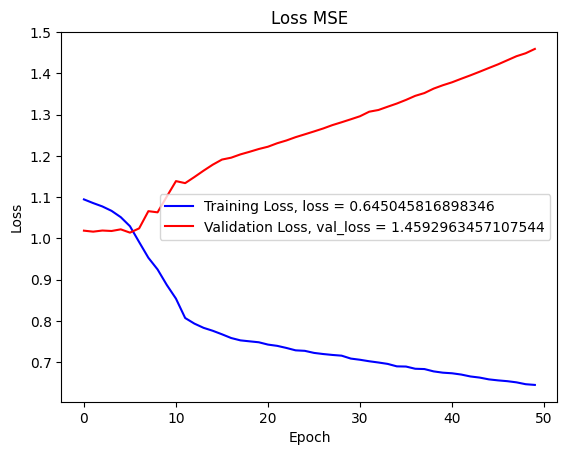

In [36]:
# Plot the loss

plt.plot(range(EPOCHS), loss, "b", label = f"Training Loss, loss = {loss[-1]}")
plt.plot(range(EPOCHS), val_loss, "-r", label = f"Validation Loss, val_loss = {val_loss[-1]}")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss")
plt.show()

In [37]:
model.evaluate(x_test, y_test) # evaluate the model

8/8 [==============================] - 1s 67ms/step - loss: 1.4340 - acc: 0.3975


[1.433983564376831, 0.3974895477294922]

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
#Predict
y_prediction = model.predict(x_test)
y_prediction = np.argmax(y_prediction, axis=1)
#Create confusion matrix and normalizes it over predicted (columns)
result = classification_report(y_test, y_prediction)
print(result)

8/8 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.28      0.29      0.28        52
           1       0.57      0.44      0.50       126
           2       0.28      0.41      0.33        61

    accuracy                           0.40       239
   macro avg       0.38      0.38      0.37       239
weighted avg       0.43      0.40      0.41       239



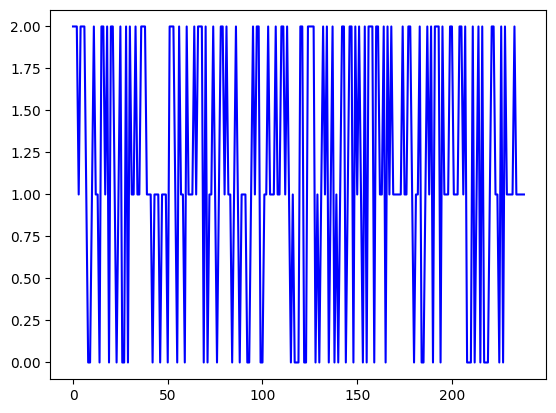

In [39]:
plt.plot(range(len(y_prediction)), y_prediction[:], "-b", label = f"Predicted") # plot the predicted labels

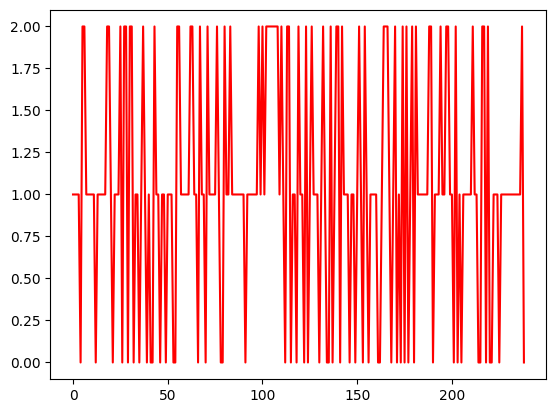

In [40]:
plt.plot(range(len(y_prediction)), y_test[:], "-r", label = f"Actual") # plot the actual labels

In [41]:
right_idx = np.where(y_prediction == y_test)[0]
idxs = range(len(y_prediction))
not_right_idx = [i for i in idxs if i not in right_idx]
right = np.zeros_like(y_prediction)
right[right_idx] = y_prediction[right_idx]
right[not_right_idx] = 3

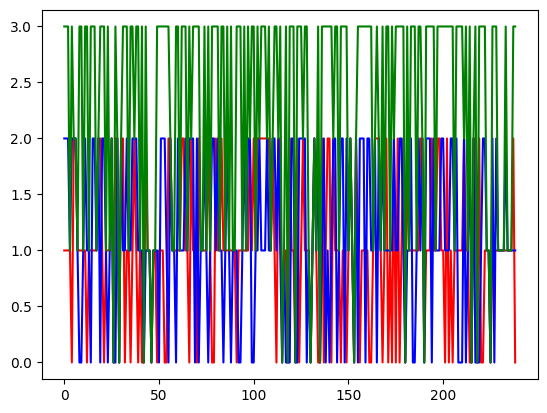

In [42]:
plt.plot(range(len(y_prediction)), y_test[:], "r", label = f"Actual")
plt.plot(range(len(y_prediction)), y_prediction[:], "b", label = f"Predicted")
plt.plot(range(len(y_prediction)), right[:], "g", label = f"Right")
plt.show()

In [43]:
y_pred_0 = np.where(y_prediction == 0)[0]
y_pred_1 = np.where(y_prediction == 1)[0]
y_pred_2 = np.where(y_prediction == 2)[0]

y_test_0 = np.where(y_test == 0)[0]
y_test_1 = np.where(y_test == 1)[0]
y_test_2 = np.where(y_test == 2)[0]

y_0_right = np.intersect1d(y_pred_0, y_test_0)
y_1_right = np.intersect1d(y_pred_1, y_test_1)
y_2_right = np.intersect1d(y_pred_2, y_test_2)

print(f"Class 0 accuracy: {len(y_0_right)/len(y_test_0)}")
print(f"Class 1 accuracy: {len(y_1_right)/len(y_test_1)}")
print(f"Class 2 accuracy: {len(y_2_right)/len(y_test_2)}")

Class 0 accuracy: 0.28846153846153844
Class 1 accuracy: 0.4365079365079365
Class 2 accuracy: 0.4098360655737705


In [215]:
import datetime

# Save the model
model.save(os.path.join(MODEL_LSTM_CLASS_OUTPUT_DIR, f"{datetime.datetime.now().strftime('%Y-%m-%d-%H')}.h5"))

# LSTM Regression

In [98]:
NUMBER_OF_TRAINING_DATA = 10
EPOCHS = 50

TRAINING_PATH = "../data_collection/datasets/training"
TEST_PATH = "../data_collection/datasets/test"

x_training = np.load(os.path.join(TRAINING_PATH, "reg", "features.npy"), allow_pickle=True)
x_training = np.array([x_training[i].T for i in range(x_training.shape[0])])[-900:]
y_training = np.load(os.path.join(TRAINING_PATH, "reg", "labels.npy"), allow_pickle=True)[-900:]


INPUT_DIM = x_training.shape[1:]

x_training = tf.convert_to_tensor(x_training.astype('float32'))
y_training = tf.convert_to_tensor(y_training.astype('float32'))

# x_training = x_training.astype('float32')
# y_training = y_training.astype('int32')
# y_training = tf.one_hot(y_training, 5)



FileNotFoundError: [Errno 2] No such file or directory: '../data_collection/datasets/training/reg/features.npy'

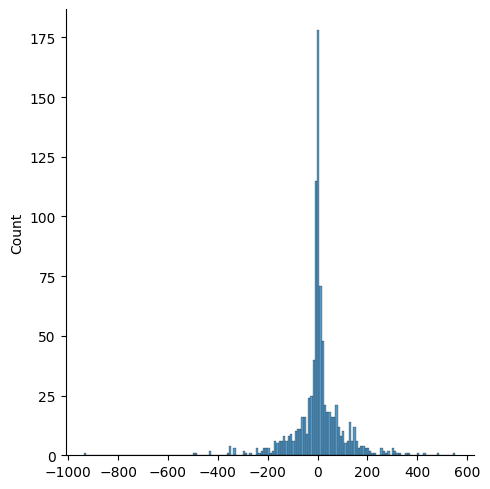

In [627]:
import seaborn as sns

sns.displot(y_training)

In [24]:
def create_lstm_regression_model(input_shape:Tuple[int, int]) -> tf.keras.Model:
    """Creates a regression model with LSTM layers."""
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        tf.keras.layers.LSTM(64, activation="tanh", dropout=0.1, return_sequences=True),
        tf.keras.layers.LSTM(86, activation="tanh", return_sequences=True),
        tf.keras.layers.LSTM(128, activation="tanh"),
        # tf.keras.layers.Dense(128, activation="relu"),
        # tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1)
    ])

    model.compile(
        # loss=weightedLoss(class_weights),
        loss=tf.keras.losses.MeanSquaredLogarithmicError(),
        optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.005, epsilon=3e-03),
        metrics=["mae"]
    )

    return model

In [25]:
model = create_lstm_regression_model(INPUT_DIM)

In [26]:
history = model.fit(x_training, y_training, validation_split=VALIDATION_SPLIT, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/50
13/13 [==============================] - 3s 86ms/step - loss: 4.6573 - mae: 57.5814 - val_loss: 4.5890 - val_mae: 79.9487
Epoch 2/50
13/13 [==============================] - 0s 25ms/step - loss: 3.6192 - mae: 57.9958 - val_loss: 4.6174 - val_mae: 79.9592
Epoch 3/50
13/13 [==============================] - 0s 22ms/step - loss: 3.5529 - mae: 57.7815 - val_loss: 4.7853 - val_mae: 80.0045
Epoch 4/50
13/13 [==============================] - 0s 23ms/step - loss: 3.5812 - mae: 57.6759 - val_loss: 4.7585 - val_mae: 80.0001
Epoch 5/50
13/13 [==============================] - 0s 23ms/step - loss: 3.5509 - mae: 57.7370 - val_loss: 4.7354 - val_mae: 79.9982
Epoch 6/50
13/13 [==============================] - 0s 22ms/step - loss: 3.5420 - mae: 57.7283 - val_loss: 4.7485 - val_mae: 80.0071
Epoch 7/50
13/13 [==============================] - 0s 21ms/step - loss: 3.5301 - mae: 57.7166 - val_loss: 4.7772 - val_mae: 80.0177
Epoch 8/50
13/13 [==============================] - 0s 22ms/step - lo

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 23, 64)            25856     
                                                                 
 lstm_7 (LSTM)               (None, 23, 86)            51944     
                                                                 
 lstm_8 (LSTM)               (None, 128)               110080    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 188,009
Trainable params: 188,009
Non-trainable params: 0
_________________________________________________________________


In [28]:
accuracy = history.history["mae"]
val_accuracy = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

KeyError: 'val_acc'

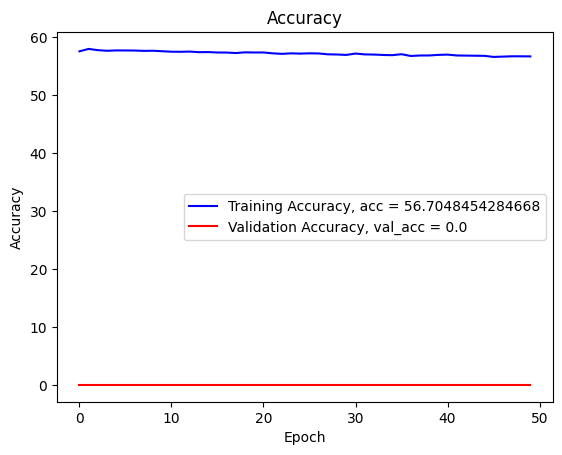

In [29]:
import matplotlib.pyplot as plt
plt.plot(range(len(accuracy)), accuracy, "b", label = f"Training Accuracy, acc = {accuracy[-1]}")
plt.plot(range(len(accuracy)), val_accuracy, "-r", label = f"Validation Accuracy, val_acc = {val_accuracy[-1]}")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

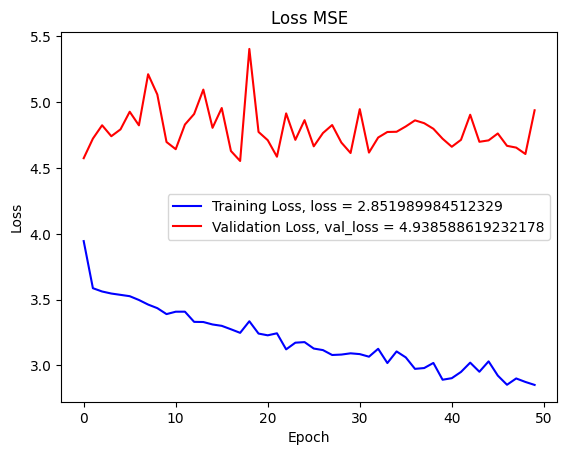

In [30]:
plt.plot(range(EPOCHS), loss, "b", label = f"Training Loss, loss = {loss[-1]}")
plt.plot(range(EPOCHS), val_loss, "-r", label = f"Validation Loss, val_loss = {val_loss[-1]}")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss MSE")
plt.show()

In [31]:
x_test = np.load(os.path.join(TEST_PATH, "reg", "features.npy"), allow_pickle=True)
x_test = np.array([x_test[i].T for i in range(x_test.shape[0])])
y_test = np.load(os.path.join(TEST_PATH, "reg", "labels.npy"), allow_pickle=True)

INPUT_DIM = x_test.shape[1:]

x_test = tf.convert_to_tensor(x_test.astype('float32'))
y_test = tf.convert_to_tensor(y_test.astype('float32'))
# y_test = tf.one_hot(y_test, 5)

In [32]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 12ms/step - loss: 3.9227 - mae: 47.5587


[3.922714948654175, 47.5587043762207]